-------------------------------------------------------------------------------------------------------------------------------
# Conversion of Some Methods from MIXR to Python Language
-------------------------------------------------------------------------------------------------------------------------------

=========================================================================================================================
# Dependences

In [16]:
import numpy
import math

=========================================================================================================================
# Constants and Methods for Converting Distance Measurement Units
These constants and methods are equivalent to those of the file distance_utils.cpp of MIXR.

In [17]:
# Constants for conversion between distances
FT2M =  0.30480        # Feet => Meters
M2FT = (1.0 / FT2M)    # Meters => Feet
IN2M =  0.02540        # Inches => Meters
M2IN =  (1.0 / IN2M)   # Meters => Inches
NM2M = 1852.0          # Nautical Miles => Meters
M2NM = (1.0 / NM2M)    # Meters => Nautical Miles
NM2FT = (NM2M * M2FT)  # Nautical Miles => Feet
FT2NM = (1.0 / NM2FT)  # Feet => Nautical Miles
SM2M = 1609.344        # Statue Miles => Meters
M2SM = (1.0 / SM2M)    # Meters => Statue Miles
SM2FT = 5280.0         # Statue Miles => Feet
FT2SM = (1.0 / SM2FT)  # Feet => Statue Miles
KM2M = 1000.0          # Kilometers => Meters
M2KM = (1.0 / KM2M)    # Meters => Kilometers
CM2M = 0.01            # Centimeters => Meters
M2CM = (1.0 / CM2M)    # Meters => Centimeters
UM2M = 0.000001        # Micrometer (Micron) => Meters
M2UM = (1.0 / UM2M)    # Meters => Micrometer (Micron)

# Methods for conversion between distances
def MetersToMicroMeters(v):
    return v * M2UM

def MicroMetersToMeters(v):
    return v * UM2M

def MetersToCentiMeters(v):
    return v * M2CM

def CentiMetersToMeters(v):
    return v * CM2M

def MetersToKiloMeters(v):
    return v * M2KM

def KiloMetersToMeters(v):
    return v * KM2M

def MetersToInches(v):
    return v * M2IN

def InchesToMeters(v):
    return v * IN2M

def MetersToFeet(v):
    return v * M2FT

def FeetToMeters(v):
    return v * FT2M

def KiloMetersToNauticalMiles(v):
    return (v * KM2M) * M2NM

def NauticalMilesToKiloMeters(v):
    return (v * NM2M) * M2KM

def KiloMetersToStatuteMiles(v):
    return (v * KM2M) * M2SM

def StatuteMilesToKiloMeters(v):
    return (v * SM2M) * M2KM

def NauticalMilesToStatuteMiles(v):
    return (v * NM2M) * M2SM

def StatuteMilesToNauticalMiles(v):
    return (v * SM2M) * M2NM

=========================================================================================================================
# Constants and Methods for Converting Angle Measurement Units
These constants and methods are equivalent to those of the file angle_utils.cpp of MIXR.

In [18]:
# Constants for conversion between angles
D2SC  = 0.0055555555555556    # Degrees => Semicircles
SC2D  = 180.0                 # Semicircles => Degrees
R2SC  = 0.3183098861837906    # Radians => Semicircles
SC2R  = math.pi               # Semicircles => Radians
R2DCC = (180.0 / math.pi)     # Radians => Degrees
D2RCC = (math.pi / 180.0)     # Degrees => Radians

# Methods for conversion between angles
def degreesToRadians(v):
    return (v * D2SC) * SC2R

def degreesToSemicircles(v):
    return v * D2SC

def radiansToDegrees(v):
    return (R2SC * v) * SC2D

def radiansToSemicircles(v):
    return v * R2SC

def semicirclesToRadians(v):
    return v * SC2R

def semicirclesToDegrees(v):
    return v * SC2D

# Methods for operation between angles
# Angle end-point check, in degrees (keeps angles within the range: -180 <= x <= 180)
def aepcdDeg(x):
    y = 0.0
    
    if (x < -180.0) or (x > 180.0):
        y = math.fmod(x, 360.0)
        if (y >  180.0):
            y = y - 360.0
        if (y < -180.0):
            y = y + 360.0
        return y
    else:
        if (x == -180.0):
            return 180.0
        else:
            return x

# Angle end-point check, in radians (keeps angles within the range: -180 <= x <= 180)
def aepcdRad(x):
    y = 0.0
    
    if (x < -math.pi) or (x > math.pi):
        y = math.fmod(x, (2.0 * math.pi))
        if (y >  math.pi):
            y = y - (2.0 * math.pi)
        if (y < -math.pi):
            y = y + (2.0 * math.pi)
        return y
    else:
        if (x == -math.pi):
            return math.pi
        else:
            return x

In [19]:
math.pi

3.141592653589793

The method aepcdDeg keeps an angle within the range -180.0 to 180.0 as presented in the figure bellow.

In the example of this figure, the angle of 225 degrees is converted to -135 degrees through aepcdDeg.

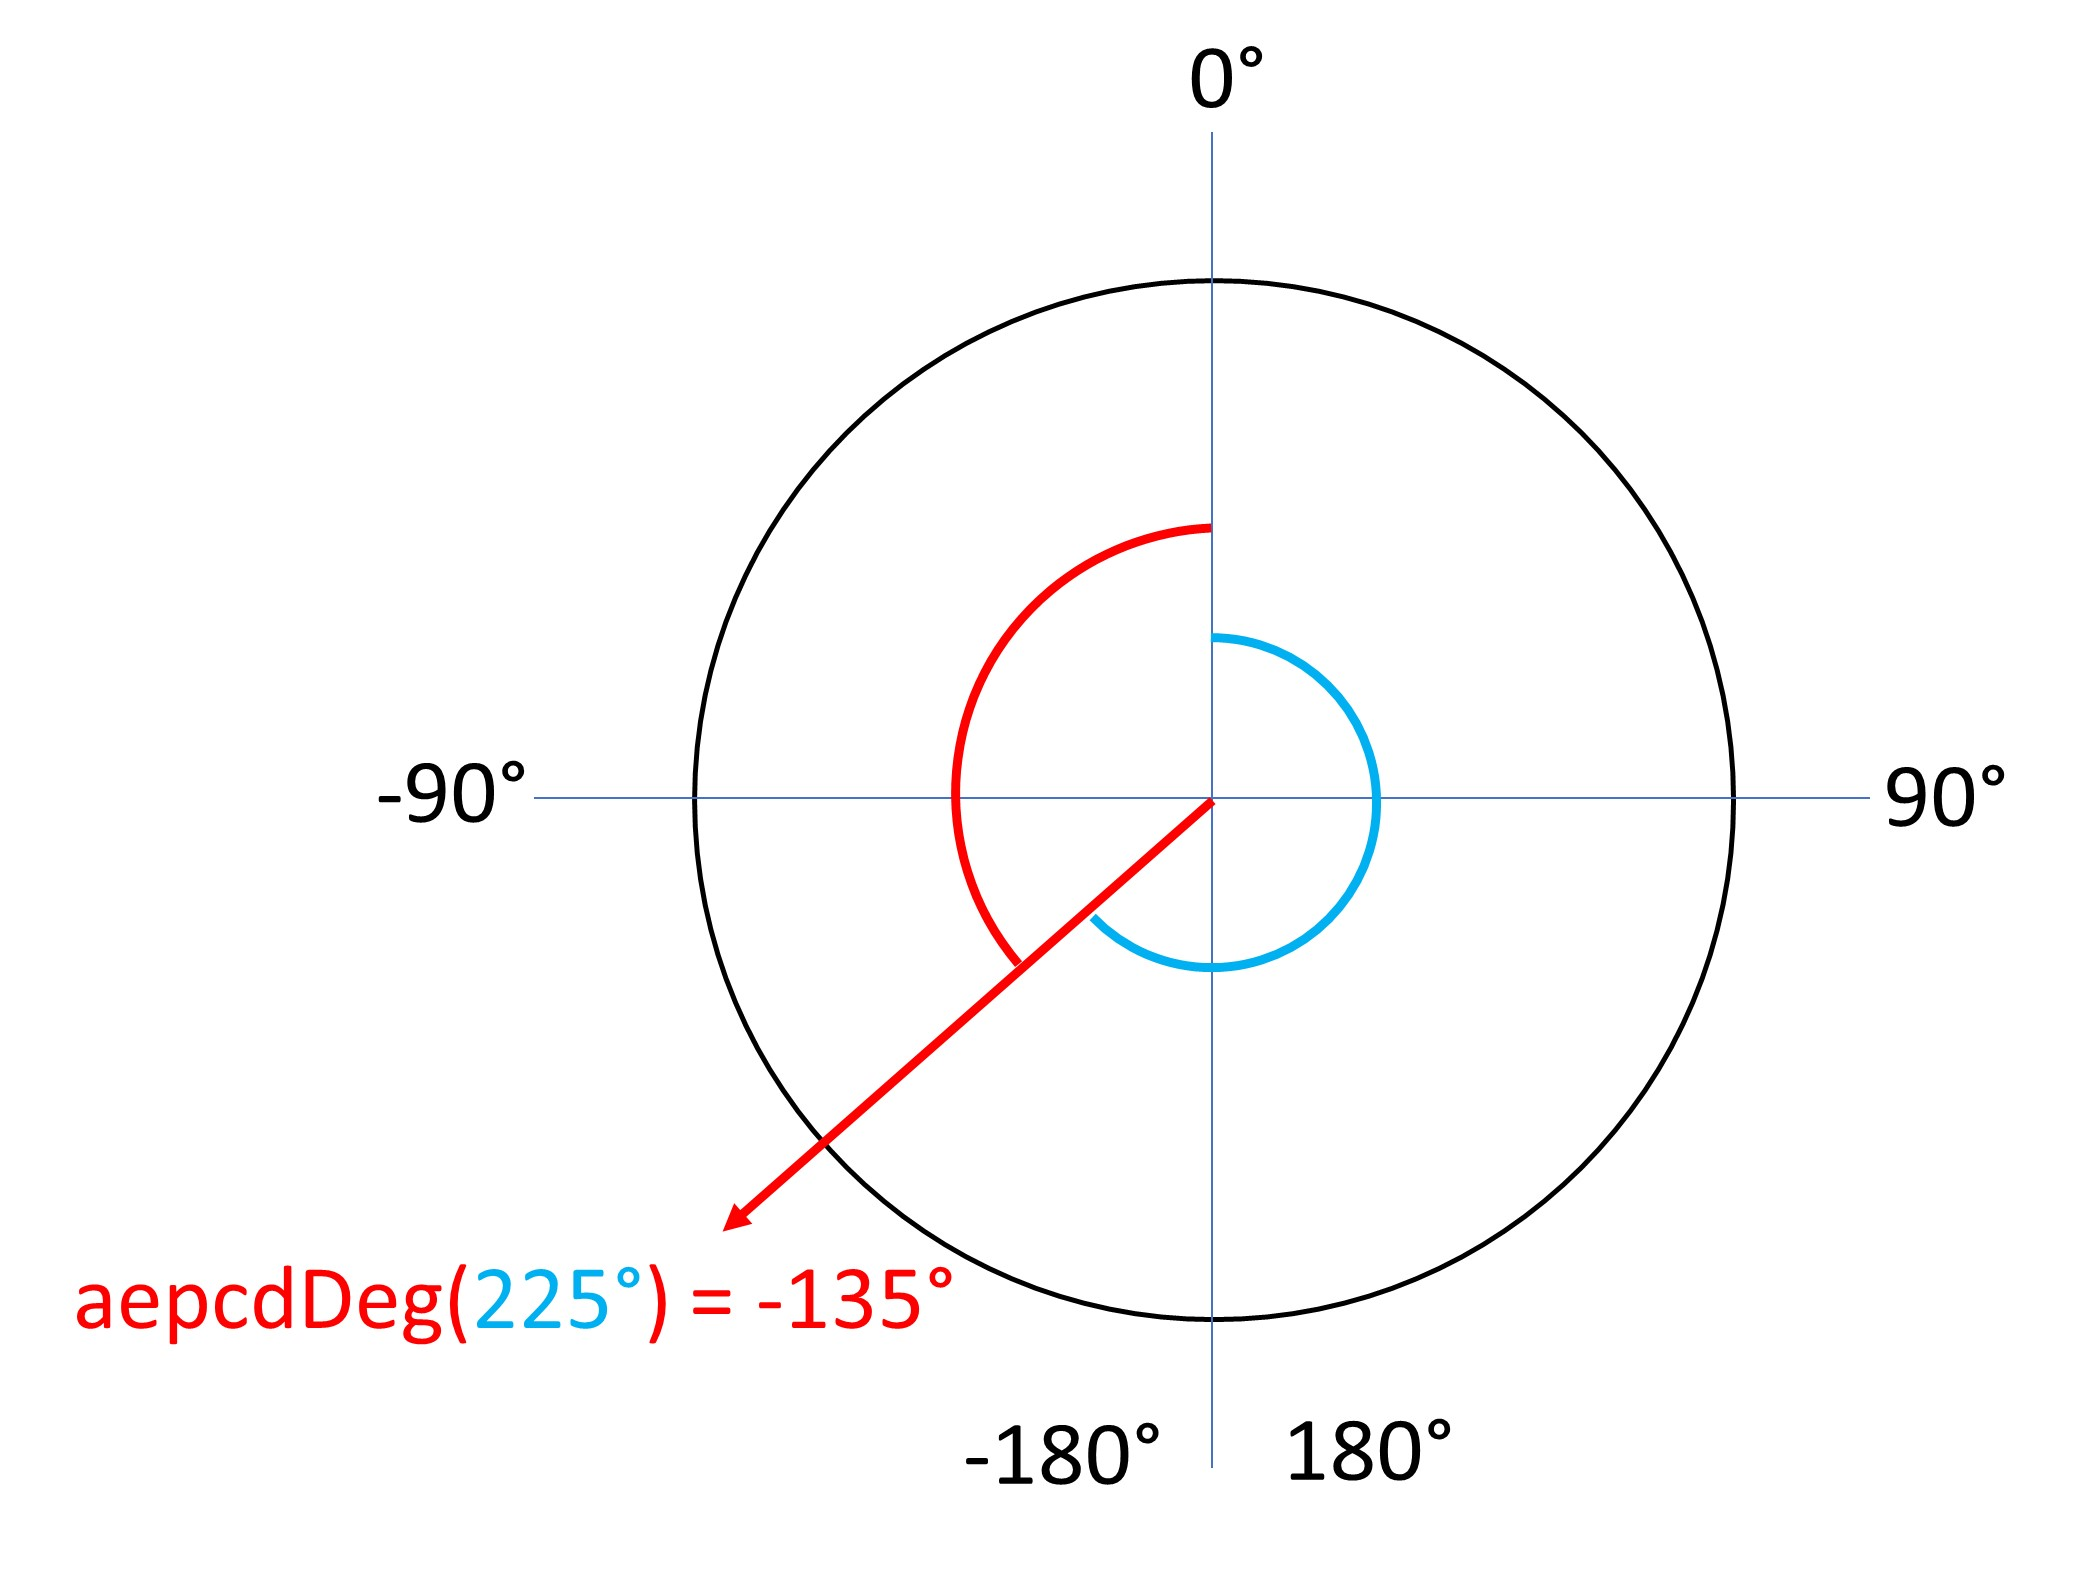

In [20]:
aepcdDeg(225)

-135.0

=========================================================================================================================
# Numerical Manipulation Methods
These methods are equivalent to those of the file arquivo math_utils.cpp of MIXR.

In [21]:
# alimd -- limits the value of x to +/-limit.
def alimd(x , limit):
    if (x > limit):
        return limit
    else:
        if (x < -limit):
            return (-limit)
        else:
            return x

In [22]:
alimd(-17,11)

-11

=========================================================================================================================
# Data from Different Models of the Earth
Data from 22 Earth surface models are stored in the array earthModelData. Each cell of this array corresponds to a type of model and has the following information: semi major axis (a), in meters; and flattening (f). 

In [23]:
earthModelData = [
                    # wgs84 -> indexEarthModel = 0
                    [6378137.0, 1.0 / 298.257223563],
    
                    # airy -> indexEarthModel = 1
                    [6377563.396, 1.0 / 299.3249646] ,
                    
                    # australianNational -> indexEarthModel = 2
                    [6378160.0, 1.0 / 298.25],
    
                    # bessel1841 -> indexEarthModel = 3
                    [6377397.155, 1.0 / 299.1528128],
    
                    # clark1866 -> indexEarthModel = 4
                    [678206.4, 1.0 / 294.9786982],
    
                    # clark1880 -> indexEarthModel = 5
                    [6378249.145, 1.0 / 293.465],
    
                    # everest -> indexEarthModel = 6
                    [6377276.345, 1.0 / 300.8017],
    
                    # fischer1960 -> indexEarthModel = 7
                    [6378166.0, 1.0 / 298.3],
    
                    # fischer1968 -> indexEarthModel = 8
                    [6378150.0, 1.0 / 298.3],
    
                    # grs1967 -> indexEarthModel = 9
                    [6378160.0, 1.0 / 298.247167427],
    
                    # grs1980 -> indexEarthModel = 10
                    [6378137.0, 1.0 / 298.257222101],
    
                    # helmert1906 -> indexEarthModel = 11
                    [6378200.0, 1.0 / 298.3],
    
                    # hough -> indexEarthModel = 12
                    [6378270.0, 1.0 / 297.0],
    
                    # international -> indexEarthModel = 13
                    [6378388.0, 1.0 / 297.0],
    
                    # kravosky -> indexEarthModel = 14
                    [6378245.0, 1.0 / 298.3],
    
                    # modAiry -> indexEarthModel = 15
                    [6377340.189, 1.0 / 299.3249646],
    
                    # modEverest -> indexEarthModel = 16
                    [6377304.063, 1.0 / 300.8017],
    
                    # modFischer -> indexEarthModel = 17
                    [6378155.0, 1.0 / 298.3],
    
                    # southAmerican1969 -> indexEarthModel = 18
                    [6378160.0, 1.0 / 298.25],
    
                    # wgs60 -> indexEarthModel = 19
                    [6378165.0, 1.0 / 298.3],
    
                    # wgs66 -> indexEarthModel = 20
                    [6378145.0, 1.0 / 298.25],
    
                    # wgs72 -> indexEarthModel = 21
                    [6378135.0, 1.0 / 298.26]
                ]

In [24]:
earthModelData

[[6378137.0, 0.0033528106647474805],
 [6377563.396, 0.0033408506414970775],
 [6378160.0, 0.003352891869237217],
 [6377397.155, 0.003342773182174806],
 [678206.4, 0.0033900753040885176],
 [6378249.145, 0.003407561378699334],
 [6377276.345, 0.003324449296662885],
 [6378166.0, 0.003352329869259135],
 [6378150.0, 0.003352329869259135],
 [6378160.0, 0.003352923712996414],
 [6378137.0, 0.003352810681182319],
 [6378200.0, 0.003352329869259135],
 [6378270.0, 0.003367003367003367],
 [6378388.0, 0.003367003367003367],
 [6378245.0, 0.003352329869259135],
 [6377340.189, 0.0033408506414970775],
 [6377304.063, 0.003324449296662885],
 [6378155.0, 0.003352329869259135],
 [6378160.0, 0.003352891869237217],
 [6378165.0, 0.003352329869259135],
 [6378145.0, 0.003352891869237217],
 [6378135.0, 0.003352779454167505]]

=========================================================================================================================
# gbd2ll
This function computes the destination (target) point from starting (ref) point given distance and initial bearing. 

This method considers an elliptical earth model, and it is similar to the method of the file nav_utils.cpp of MIXR.

Inputs:

    - latitude (slat) and longitude (slon) of the starting point; 
    
    - bearing (brg), in degrees, between the starting and destination points;
    
    - distance (dist) or ground range, in nautical miles (nm), between the starting and destination points; and
    
    - an index of an optional earth model (default: WGS-84 (indexEarthModel = 0)).

Outputs:

    - latitude (dlat) and longitude (dlon) of the destination point. 
    
-------------------------------------------------------------------------------------
Observation: possible values for indexEarthModel.

wgs84 -> indexEarthModel = 0

airy -> indexEarthModel = 1

australianNational -> indexEarthModel = 2

bessel1841 -> indexEarthModel = 3

clark1866 -> indexEarthModel = 4

clark1880 -> indexEarthModel = 5

everest -> indexEarthModel = 6

fischer1960 -> indexEarthModel = 7

fischer1968 -> indexEarthModel = 8

grs1967 -> indexEarthModel = 9

grs1980 -> indexEarthModel = 10

helmert1906 -> indexEarthModel = 11

hough -> indexEarthModel = 12

international -> indexEarthModel = 13

kravosky -> indexEarthModel = 14

modAiry -> indexEarthModel = 15

modEverest -> indexEarthModel = 16

modFischer -> indexEarthModel = 17

southAmerican1969 -> indexEarthModel = 18

wgs60 -> indexEarthModel = 19

wgs66 -> indexEarthModel = 20

wgs72 -> indexEarthModel = 21

In [25]:
def gbd2ll(slat, slon, brg, dist, indexEarthModel):
    
    # --------------------------------------------------------------------------------------------------------------
    # initialize earth model parameters
    # --------------------------------------------------------------------------------------------------------------
    if ((indexEarthModel < 0) or (indexEarthModel > 21)):
        # consider the default WGS-84
        indexEarthModel = 0
    
    tempData = earthModelData[indexEarthModel]
    
    # semi major axis (a), in meters
    a = tempData[0]
    
    # flattening (f)
    f = tempData[1]
    
    # semi minor axis (b), in meters
    b = a*(1.0 - f)
    
    # eccentricity squared (e2)
    e2 = f*(2.0 - f)
    
    eemA = a * M2NM
    
    eemE2 = e2
    
    # --------------------------------------------------------------------------------------------------------------
    # convert slat, slon and brg to radians
    # --------------------------------------------------------------------------------------------------------------
    slatr = slat * D2RCC
    slonr = slon * D2RCC
    psi = aepcdDeg(brg) * D2RCC
    
    # --------------------------------------------------------------------------------------------------------------
    # transform source point about zero longitude
    # --------------------------------------------------------------------------------------------------------------
    tslatr = slatr
    
    # --------------------------------------------------------------------------------------------------------------
    # calculate Gaussian radius of curvature at source lat
    # --------------------------------------------------------------------------------------------------------------
    grad = eemA * (1.0 - ((eemE2 / 2.0) * math.cos(2.0 * tslatr))) # Gaussian radius
    
    # --------------------------------------------------------------------------------------------------------------
    # compute transformed destination lat/lon
    # --------------------------------------------------------------------------------------------------------------
    tdlatr = 0.0
    tdlonr = -slonr
    if (dist <= 10000.0):
        x = math.cos(dist / grad) * math.sin(tslatr)
        y = math.sin(dist / grad) * math.cos(tslatr) * math.cos(psi)
        tdlatr = math.asin(x + y)
        
        x = math.cos(dist / grad) - math.sin(tslatr) * math.sin(tdlatr)
        y = math.cos(tslatr) * math.cos(tdlatr)
        
        z = 0.0
        if (y != 0.0):
            z = x / y
        else:
            if (x >= 0):
                z = 1.0
            else:
                z = -1.0
        z = alimd(z, 1.0)
        
        tdlonr = math.acos(z)
        
        if( psi < 0.0 ):
            tdlonr = -tdlonr
    
    # --------------------------------------------------------------------------------------------------------------
    # retransform destination point
    # --------------------------------------------------------------------------------------------------------------
    dlatr = tdlatr
    dlonr = tdlonr + slonr
    
    # --------------------------------------------------------------------------------------------------------------
    # convert to degrees
    # --------------------------------------------------------------------------------------------------------------
    dlat0 = dlatr * R2DCC
    dlon0 = dlonr * R2DCC
            
    # --------------------------------------------------------------------------------------------------------------
    # apply ellipsoidal correction
    # --------------------------------------------------------------------------------------------------------------
    ellip = 0.00334 * math.pow( math.cos(tslatr), 2 )
    dlat0 = dlat0 - ellip * (dlat0 - slat)
    dlon0 = dlon0 + ellip * (dlon0 - slon)
    
    # --------------------------------------------------------------------------------------------------------------
    # limit check for destination longitude
    # --------------------------------------------------------------------------------------------------------------
    if (dlon0 > 180.0):
        dlon0 = dlon0 - 360.0
    else:
        if (dlon0 < -180.0):
            dlon0 = dlon0 + 360.0
    
    # --------------------------------------------------------------------------------------------------------------
    # return to caller
    # --------------------------------------------------------------------------------------------------------------
    dlat = dlat0
    dlon = dlon0
    
    return dlat, dlon

In [26]:
# test of the method gbd2ll => varying the latitude

for slat in range(-90,91): # -90 to 90
    dlat, dlon = gbd2ll(slat,0,90,10,0)
    print(dlat)
    print(dlon)

#for slat in range(-90,91): # -90 a 90
#     for slon in range(-180,181): # -180 a 180
#          for brg in range(360): # 0 a 359
#              dlat, dlon = gbd2ll(slat,slon,brg,10,0)
#              print("dlat =", dlat)
#              print("dlon =", dlon)

-89.83418701693871
90.0
-88.98634757576347
9.415248744510711
-87.99314098345828
4.740382278472649
-86.99542522678166
3.1651144170875685
-85.99657014554931
2.3757863819641285
-84.99725813168045
1.9019417621729267
-83.99771740381141
1.5860677864842774
-82.99804590987584
1.360530322714873
-81.99829266114762
1.1914780995954755
-80.99848489860943
1.0600934785561649
-79.998638971774
0.9550814627173363
-78.99876528707424
0.8692524129840308
-77.99887078322021
0.7978123357899647
-76.99896026452528
0.73744186284892
-75.99903716299073
0.6857697835868886
-74.9991039956411
0.6410570873703242
-73.99916265039901
0.6019994525554359
-72.99921457108407
0.5675994260047076
-71.99926088075662
0.5370811993090662
-70.99930246611719
0.5098322918631161
-69.9993400365895
0.4853627258651317
-68.99937416652516
0.4632758634697723
-67.9994053258992
0.44324719632449033
-66.99943390299886
0.42500866751803085
-65.99946022144084
0.408336912539198
-64.99948455310494
0.39304432205371315
-63.999507128082925
0.378972167022

In [27]:
# test of the method gbd2ll => varying the longitude

for slon in range(-180,181): # -180 to 180
    dlat, dlon = gbd2ll(0,slon,0,10,0)
    print(dlat)
    print(dlon)

0.16636919082127308
-180.0
0.16636919082127308
-179.0
0.16636919082127308
-178.0
0.16636919082127308
-177.0
0.16636919082127308
-176.0
0.16636919082127308
-175.0
0.16636919082127308
-174.0
0.16636919082127308
-173.0
0.16636919082127308
-172.0
0.16636919082127308
-171.0
0.16636919082127308
-170.0
0.16636919082127308
-169.0
0.16636919082127308
-168.0
0.16636919082127308
-167.0
0.16636919082127308
-166.0
0.16636919082127308
-165.0
0.16636919082127308
-164.0
0.16636919082127308
-163.0
0.16636919082127308
-162.0
0.16636919082127308
-161.0
0.16636919082127308
-160.0
0.16636919082127308
-159.0
0.16636919082127308
-158.0
0.16636919082127308
-157.0
0.16636919082127308
-156.0
0.16636919082127308
-155.0
0.16636919082127308
-154.0
0.16636919082127308
-153.0
0.16636919082127308
-152.0
0.16636919082127308
-151.0
0.16636919082127308
-150.0
0.16636919082127308
-149.0
0.16636919082127308
-148.0
0.16636919082127308
-147.0
0.16636919082127308
-146.0
0.16636919082127308
-145.0
0.16636919082127308
-144.0
0

=========================================================================================================================
# fbd2ll
This function computes the destination (target) point from starting (ref) point given distance and initial bearing. 

This method considers the flat-earth projection and a spherical earth radius of 'ERAD60'. This method is similar to the method of the file nav_utils.inl of MIXR.

Inputs:

    - latitude (slat) and longitude (slon) of the starting point; 
    
    - bearing (brg), in degrees, between the starting and destination points; and
    
    - distance (dist) or ground range, in nautical miles (nm), between the starting and destination points.

Outputs:

    - latitude (dlat) and longitude (dlon) of the destination point.

In [28]:
def fbd2ll(slat, slon, brg, dist):
    
    ang = brg * D2RCC
    ew = math.sin(ang) * dist
    ns = math.cos(ang) * dist

    dlat = slat + (ns/60.0)

    tlat = slat
    if (tlat > 89.0) or (tlat < -89.0):
        tlat = 89.0

    dlon = aepcdDeg( slon + ( ew / (60.0 * math.cos(tlat * D2RCC)) ) )
    
    return dlat, dlon    

In [29]:
# test of the method fbd2ll => varying the latitude

for slat in range(-90,91): # -90 to 90
    dlat, dlon = fbd2ll(slat,0,90,10)
    print(dlat)
    print(dlon)

-90.0
9.549781416424983
-89.0
9.549781416424983
-88.0
4.775618057973955
-87.0
3.184553768216225
-86.0
2.3892645043672815
-85.0
1.9122855409449766
-84.0
1.5944620389176047
-83.0
1.3675848413541796
-82.0
1.197549422387953
-81.0
1.0654088702499431
-80.0
0.9597950805239386
-79.0
0.8734738440279743
-78.0
0.8016223907906881
-77.0
0.7409019137643004
-76.0
0.6889275824064583
-75.0
0.6439505508593789
-74.0
0.6046592130905502
-73.0
0.5700506033055447
-72.0
0.5393446629166315
-71.0
0.5119255811262069
-70.0
0.4873007333605144
-69.0
0.4650713516042225
-68.0
0.44491119375900245
-67.0
0.4265507775412421
-66.0
0.4097655559290397
-65.0
0.3943669305254164
-64.0
0.3801953387841432
-63.0
0.3671148774308778
-62.0
0.3550090780315854
-61.0
0.34377755660455234
-60.0
0.33333333333333326
-59.0
0.32360067106839274
-58.0
0.31451331913330977
-57.0
0.3060130764627772
-56.0
0.2980486083285668
-55.0
0.2905744659368497
-54.0
0.28355026945067996
-53.0
0.2769400235204138
-52.0
0.2707115409137907
-51.0
0.2648359548442915

In [30]:
# test of the method fbd2ll => varying the longitude

for slon in range(-180,181): # -180 to 180
    dlat, dlon = fbd2ll(0,slon,0,10)
    print(dlat)
    print(dlon)

0.16666666666666666
180.0
0.16666666666666666
-179.0
0.16666666666666666
-178.0
0.16666666666666666
-177.0
0.16666666666666666
-176.0
0.16666666666666666
-175.0
0.16666666666666666
-174.0
0.16666666666666666
-173.0
0.16666666666666666
-172.0
0.16666666666666666
-171.0
0.16666666666666666
-170.0
0.16666666666666666
-169.0
0.16666666666666666
-168.0
0.16666666666666666
-167.0
0.16666666666666666
-166.0
0.16666666666666666
-165.0
0.16666666666666666
-164.0
0.16666666666666666
-163.0
0.16666666666666666
-162.0
0.16666666666666666
-161.0
0.16666666666666666
-160.0
0.16666666666666666
-159.0
0.16666666666666666
-158.0
0.16666666666666666
-157.0
0.16666666666666666
-156.0
0.16666666666666666
-155.0
0.16666666666666666
-154.0
0.16666666666666666
-153.0
0.16666666666666666
-152.0
0.16666666666666666
-151.0
0.16666666666666666
-150.0
0.16666666666666666
-149.0
0.16666666666666666
-148.0
0.16666666666666666
-147.0
0.16666666666666666
-146.0
0.16666666666666666
-145.0
0.16666666666666666
-144.0
0.

=========================================================================================================================
# gll2bd
This function computes the initial bearing and the distance from the starting point to the destination point.

This method considers an elliptical earth model, and it is similar to the method of the file nav_utils.cpp of MIXR.

Inputs:

    - latitude (slat) and longitude (slon) of the starting point;
    
    - latitude (dlat) and longitude (dlon) of the destination point; and
    
    - an index of an optional earth model (default: WGS-84 (indexEarthModel = 0)).

Outputs:

    - bearing (brg), in degrees, between the starting and destination points; and
    
    - distance (dist) or ground range, in nautical miles (nm), between the starting and destination points. 
    
-------------------------------------------------------------------------------------
Observation: possible values for indexEarthModel.

wgs84 -> indexEarthModel = 0

airy -> indexEarthModel = 1

australianNational -> indexEarthModel = 2

bessel1841 -> indexEarthModel = 3

clark1866 -> indexEarthModel = 4

clark1880 -> indexEarthModel = 5

everest -> indexEarthModel = 6

fischer1960 -> indexEarthModel = 7

fischer1968 -> indexEarthModel = 8

grs1967 -> indexEarthModel = 9

grs1980 -> indexEarthModel = 10

helmert1906 -> indexEarthModel = 11

hough -> indexEarthModel = 12

international -> indexEarthModel = 13

kravosky -> indexEarthModel = 14

modAiry -> indexEarthModel = 15

modEverest -> indexEarthModel = 16

modFischer -> indexEarthModel = 17

southAmerican1969 -> indexEarthModel = 18

wgs60 -> indexEarthModel = 19

wgs66 -> indexEarthModel = 20

wgs72 -> indexEarthModel = 21

In [31]:
def gll2bd(slat, slon, dlat, dlon, indexEarthModel):
    
    # --------------------------------------------------------------------------------------------------------------
    # initialize earth model parameters
    # --------------------------------------------------------------------------------------------------------------
    if ((indexEarthModel < 0) or (indexEarthModel > 21)):
        # consider the default WGS-84
        indexEarthModel = 0
    
    tempData = earthModelData[indexEarthModel]
    
    # semi major axis (a), in meters
    a = tempData[0]
    
    # flattening (f)
    f = tempData[1]
    
    # semi minor axis (b), in meters
    b = a*(1.0 - f)
    
    # eccentricity squared (e2)
    e2 = f*(2.0 - f)
    
    eemA = a * M2NM
    
    eemE2 = e2
    
    # --------------------------------------------------------------------------------------------------------------
    # check for source and destination at same point
    # --------------------------------------------------------------------------------------------------------------
    if (dlat == slat) and ( dlon == slon ):
        dist = 0.0
        brg  = 0.0
    else:
        # --------------------------------------------------------------------------------------------------------------
        # transform destination lat/lon into the equivalent spherical lat/lon
        # --------------------------------------------------------------------------------------------------------------
        # Ellipsoidal correction factor
        ellip = 0.00334 * math.pow( math.cos(slat * D2RCC), 2 )
        
        dlat0 = aepcdDeg( dlat + ellip * aepcdDeg(dlat - slat) )
        dlon0 = aepcdDeg( dlon - ellip * aepcdDeg(dlon - slon) )
        
        # --------------------------------------------------------------------------------------------------------------
        # transform lat/lon about zero longitude
        # --------------------------------------------------------------------------------------------------------------
        tslat = slat           # Transformed source lat (deg)
        tdlat = dlat0          # Transformed destination lat (deg)
        tdlon = dlon0 - slon   # Transformed destination lon (deg)
        if tdlon < -180.0:
            tdlon = tdlon + 360.0
        else:
            if tdlon > 180.0:
                tdlon = tdlon - 360.0
        
        # --------------------------------------------------------------------------------------------------------------
        # convert lat/lon to radians
        # --------------------------------------------------------------------------------------------------------------
        tslatr = tslat * D2RCC  # Transformed source lat (rad)
        tdlatr = tdlat * D2RCC  # Transformed destination lat (rad)
        tdlonr = tdlon * D2RCC  # Transformed destination lon (rad)
        
        # --------------------------------------------------------------------------------------------------------------
        # calculate Gaussian radius of curvature at source lat
        # --------------------------------------------------------------------------------------------------------------
        grad = eemA * (1.0 - ((eemE2 / 2.0) * math.cos(2.0 * tslatr)))  # Gaussian radius
        
        # --------------------------------------------------------------------------------------------------------------
        # compute great circle distance
        # --------------------------------------------------------------------------------------------------------------
        tzlonr = tdlonr    # Lon deviation(rad)
        x = math.sin(tslatr) * math.sin(tdlatr)
        y = math.cos(tslatr) * math.cos(tdlatr) * math.cos(tzlonr)
        z = x + y
        z = alimd(z, 1.0)
        
        dist = grad * math.fabs(math.acos(z))
        if (dist == 0.0):
            brg = 0.0
        else:
            # --------------------------------------------------------------------------------------------------------------
            # compute great circle bearing
            # --------------------------------------------------------------------------------------------------------------
            x = math.sin(tdlatr) - math.sin(tslatr) * math.cos(dist / grad)
            y = math.sin(dist / grad) * math.cos(tslatr)
            if (y != 0.0):
                z = x / y
            else:
                if (x >= 0):
                    z = 1.0
                else:
                    z = -1.0
            z = alimd(z, 1.0)

            x = math.acos(z) * R2DCC
            if (tzlonr < 0.0):
                x = 360.0 - x
            brg = aepcdDeg(x)
    
    return brg, dist    

In [32]:
# test of the method gll2bd => varying the latitude
# slat,slon=0,dlat=0,dlon=0

for slat in range(-90,91): # -90 to 90
    brg, dist = gll2bd(slat,0.0,0.0,0.0,0)
    print(brg)
    print(dist)

0.0
5427.801752224722
0.0
5367.487396405241
2.831646840510158e-06
5307.16239692338
2.831646840510158e-06
5246.827139870403
0.0
5186.482023002056
0.0
5126.127454974719
0.0
5065.763854570322
0.0
5005.3916499112065
1.9090959104164224e-06
4945.011277666113
0.0
4884.623182248485
1.4787793334710982e-06
4824.227815008299
0.0
4763.825633418587
0.0
4703.417100257898
0.0
4643.002682789859
0.0
4582.582851941073
0.0
4522.158081478539
0.0
4461.7288471877955
1.2074182697257333e-06
4401.295626052998
0.0
4340.858895440115
1.4787793334710982e-06
4280.419132284431
0.0
4219.976812283555
1.4787793334710982e-06
4159.532409097083
1.7075472925031877e-06
4099.086393554105
1.7075472925031877e-06
4038.639232869707
1.7075472925031877e-06
3978.1913898716007
8.537736462515939e-07
3917.743322238037
1.4787793334710982e-06
3857.2954817480913
0.0
3796.8483135454526
0.0
3736.402255416788
1.7075472925031877e-06
3675.9577370857514
0.0
3615.515179523685
1.2074182697257333e-06
3555.0749942780626
0.0
3494.6375828196265
0.0


In [33]:
# test of the method fbd2ll => varying the longitude
# slat=0,slon,dlat=0,dlon=0

for slon in range(-180,181): # -180 to 180
    brg, dist = gll2bd(0.0,slon,0.0,0.0,0)
    print(brg)
    print(dist)

90.0
10747.158601022504
90.0
10687.452164350163
90.0
10627.745727677813
90.0
10568.039291005469
90.0
10508.332854333119
90.0
10448.626417660771
90.0
10388.919980988425
90.0
10329.213544316079
90.0
10269.507107643733
90.0
10209.800670971383
90.0
10150.094234299035
90.0
10090.387797626689
90.0
10030.681360954342
90.0
9970.974924281994
90.0
9911.268487609646
90.0
9851.5620509373
90.0
9791.855614264952
90.0
9732.149177592604
90.0
9672.442740920258
90.0
9612.73630424791
90.0
9553.029867575564
90.0
9493.323430903216
90.0
9433.61699423087
90.0
9373.910557558522
90.0
9314.204120886176
90.0
9254.497684213828
90.0
9194.791247541478
90.0
9135.084810869132
90.0
9075.378374196785
90.0
9015.671937524437
90.0
8955.965500852091
90.0
8896.259064179745
90.0
8836.552627507397
90.0
8776.846190835047
90.0
8717.139754162701
90.0
8657.433317490355
90.0
8597.726880818007
90.0
8538.02044414566
90.0
8478.314007473313
90.0
8418.607570800965
90.0
8358.901134128617
90.0
8299.19469745627
90.0
8239.488260783924
90.0

=========================================================================================================================
# fll2bd
This function computes the initial bearing and the distance from the starting point to the destination point.

This method considers a flat earth projection and a spherical earth radius of 'ERAD60'.

Inputs:

    - latitude (slat) and longitude (slon) of the starting point; and
    
    - latitude (dlat) and longitude (dlon) of the destination point.

Outputs:

    - bearing (brg), in degrees, between the starting and destination points; and
    
    - distance (dist) or ground range, in nautical miles (nm), between the starting and destination points. 

In [34]:
def fll2bd(slat, slon, dlat, dlon):
    ns = aepcdDeg(dlat - slat) * 60.0
    ew = aepcdDeg(dlon - slon) * 60.0 * math.cos(slat * D2RCC)
    brg = math.atan2(ew,ns) * R2DCC
    dist = math.sqrt(ns*ns + ew*ew)
    
    return brg, dist

In [35]:
# test of the method gll2bd => varying the latitude
# slat,slon=0,dlat=0,dlon=0

for slat in range(-90,91): # -90 to 90
    brg, dist = fll2bd(slat,0.0,0.0,0.0)
    print(brg)
    print(dist)

0.0
5400.0
0.0
5340.0
0.0
5280.0
0.0
5220.0
0.0
5160.0
0.0
5100.0
0.0
5040.0
0.0
4980.0
0.0
4920.0
0.0
4860.0
0.0
4800.0
0.0
4740.0
0.0
4680.0
0.0
4620.0
0.0
4560.0
0.0
4500.0
0.0
4440.0
0.0
4380.0
0.0
4320.0
0.0
4260.0
0.0
4200.0
0.0
4140.0
0.0
4080.0
0.0
4020.0
0.0
3960.0
0.0
3900.0
0.0
3840.0
0.0
3780.0
0.0
3720.0
0.0
3660.0
0.0
3600.0
0.0
3540.0
0.0
3480.0
0.0
3420.0
0.0
3360.0
0.0
3300.0
0.0
3240.0
0.0
3180.0
0.0
3120.0
0.0
3060.0
0.0
3000.0
0.0
2940.0
0.0
2880.0
0.0
2820.0
0.0
2760.0
0.0
2700.0
0.0
2640.0
0.0
2580.0
0.0
2520.0
0.0
2460.0
0.0
2400.0
0.0
2340.0
0.0
2280.0
0.0
2220.0
0.0
2160.0
0.0
2100.0
0.0
2040.0
0.0
1980.0
0.0
1920.0
0.0
1860.0
0.0
1800.0
0.0
1740.0
0.0
1680.0
0.0
1620.0
0.0
1560.0
0.0
1500.0
0.0
1440.0
0.0
1380.0
0.0
1320.0
0.0
1260.0
0.0
1200.0
0.0
1140.0
0.0
1080.0
0.0
1020.0
0.0
960.0
0.0
900.0
0.0
840.0
0.0
780.0
0.0
720.0
0.0
660.0
0.0
600.0
0.0
540.0
0.0
480.0
0.0
420.0
0.0
360.0
0.0
300.0
0.0
240.0
0.0
180.0
0.0
120.0
0.0
60.0
0.0
0.0
180.0
60.0
180.0
12

In [36]:
# test of the method fbd2ll => varying the longitude
# slat=0,slon,dlat=0,dlon=0

for slon in range(-180,181): # -180 to 180
    brg, dist = fll2bd(0.0,slon,0.0,0.0)
    print(brg)
    print(dist)

90.0
10800.0
90.0
10740.0
90.0
10680.0
90.0
10620.0
90.0
10560.0
90.0
10500.0
90.0
10440.0
90.0
10380.0
90.0
10320.0
90.0
10260.0
90.0
10200.0
90.0
10140.0
90.0
10080.0
90.0
10020.0
90.0
9960.0
90.0
9900.0
90.0
9840.0
90.0
9780.0
90.0
9720.0
90.0
9660.0
90.0
9600.0
90.0
9540.0
90.0
9480.0
90.0
9420.0
90.0
9360.0
90.0
9300.0
90.0
9240.0
90.0
9180.0
90.0
9120.0
90.0
9060.0
90.0
9000.0
90.0
8940.0
90.0
8880.0
90.0
8820.0
90.0
8760.0
90.0
8700.0
90.0
8640.0
90.0
8580.0
90.0
8520.0
90.0
8460.0
90.0
8400.0
90.0
8340.0
90.0
8280.0
90.0
8220.0
90.0
8160.0
90.0
8100.0
90.0
8040.0
90.0
7980.0
90.0
7920.0
90.0
7860.0
90.0
7800.0
90.0
7740.0
90.0
7680.0
90.0
7620.0
90.0
7560.0
90.0
7500.0
90.0
7440.0
90.0
7380.0
90.0
7320.0
90.0
7260.0
90.0
7200.0
90.0
7140.0
90.0
7080.0
90.0
7020.0
90.0
6960.0
90.0
6900.0
90.0
6840.0
90.0
6780.0
90.0
6720.0
90.0
6660.0
90.0
6600.0
90.0
6540.0
90.0
6480.0
90.0
6420.0
90.0
6360.0
90.0
6300.0
90.0
6240.0
90.0
6180.0
90.0
6120.0
90.0
6060.0
90.0
6000.0
90.0
5940.0
90

=========================================================================================================================
# convertEcef2Geod
This function converts Earth Centered, Earth Fixed (ECEF) coordinates (x,y,z) to geodetic coordinates (latitude,longitude,altitude).

Inputs:

    - ECEF coordinates (x,y,z), in meters; and
    
    - an index of an optional earth model (default: WGS-84 (indexEarthModel = 0)).

Outputs:

    - geodetic coordinates (lat, lon, alt), considering lat and lon in degrees, and alt in meters.

-------------------------------------------------------------------------------------
Observation: possible values for indexEarthModel.

wgs84 -> indexEarthModel = 0

airy -> indexEarthModel = 1

australianNational -> indexEarthModel = 2

bessel1841 -> indexEarthModel = 3

clark1866 -> indexEarthModel = 4

clark1880 -> indexEarthModel = 5

everest -> indexEarthModel = 6

fischer1960 -> indexEarthModel = 7

fischer1968 -> indexEarthModel = 8

grs1967 -> indexEarthModel = 9

grs1980 -> indexEarthModel = 10

helmert1906 -> indexEarthModel = 11

hough -> indexEarthModel = 12

international -> indexEarthModel = 13

kravosky -> indexEarthModel = 14

modAiry -> indexEarthModel = 15

modEverest -> indexEarthModel = 16

modFischer -> indexEarthModel = 17

southAmerican1969 -> indexEarthModel = 18

wgs60 -> indexEarthModel = 19

wgs66 -> indexEarthModel = 20

wgs72 -> indexEarthModel = 21

In [37]:
def convertEcef2Geod(x, y, z, indexEarthModel):
    
    # --------------------------------------------------------------------------------------------------------------
    # initialize earth model parameters
    # --------------------------------------------------------------------------------------------------------------
    if ((indexEarthModel < 0) or (indexEarthModel > 21)):
        # consider the default WGS-84
        indexEarthModel = 0
    
    tempData = earthModelData[indexEarthModel]
    
    # semi major axis (a), in meters
    a = tempData[0]
    
    # flattening (f)
    f = tempData[1]
    
    # semi minor axis (b), in meters
    b = a*(1.0 - f)
    
    # eccentricity squared (e2)
    e2 = f*(2.0 - f)
    
    # --------------------------------------------------------------------------------------------------------------
    # initialize pLat, pLon and pAlt
    # --------------------------------------------------------------------------------------------------------------
    lat = 0.0
    lon = 0.0
    alt = 0.0
    
    # --------------------------------------------------------------------------------------------------------------
    # define local constants
    # --------------------------------------------------------------------------------------------------------------
    p = math.sqrt(x*x + y*y)
    ACCURACY = 0.1 # iterate to accuracy of 0.1 meter
    EPS = 1.0E-10
    MAX_LOOPS = 10
    
    # --------------------------------------------------------------------------------------------------------------
    # initialize local variables
    # --------------------------------------------------------------------------------------------------------------
    status = "NORMAL"
    rn = a
    phi = 0.0
    oldH = 0.0
    newH = 100.0 * ACCURACY  # (newH - oldH) significantly different
    idx = 0
    
    # --------------------------------------------------------------------------------------------------------------
    # check status
    # --------------------------------------------------------------------------------------------------------------
    polarXY = math.fabs(x) + math.fabs(y)
    if (polarXY < EPS):
        status = "POLAR_POINT"
    
    # --------------------------------------------------------------------------------------------------------------
    # iterate for accurate latitude and altitude
    # --------------------------------------------------------------------------------------------------------------
    if (status == "NORMAL"):
        idx = 1
        while (idx <= MAX_LOOPS) and (math.fabs(newH - oldH) > ACCURACY):
            sinPhi = z / (newH + rn*(1.0 - e2))
            q = z + e2*rn*sinPhi
            phi = math.atan2(q, p)
            cosPhi = math.cos(phi)
            w = math.sqrt(1.0 - e2*sinPhi*sinPhi)
            rn = a/w
            oldH = newH
            newH = p/cosPhi - rn
            idx = idx + 1
    
    # --------------------------------------------------------------------------------------------------------------
    # re-check status after iteration
    # --------------------------------------------------------------------------------------------------------------
    if (idx > MAX_LOOPS):
        status = "TOO_MANY_LOOPS"
    
    # --------------------------------------------------------------------------------------------------------------
    # process based on status
    # --------------------------------------------------------------------------------------------------------------
    if (status == "NORMAL"):
        # begin iteration loop
        
        # calculate outputs
        lat = R2DCC * phi
        lon = R2DCC * math.atan2(y, x)
        alt = newH
    else:
        if (status == "POLAR_POINT"):
            if (z < 0.0):
                lat = -90.0
                lon = 0.0
                alt = -b - z
            else:
                lat = 90.0
                lon = 0.0
                alt = -b + z    
    
    return lat, lon, alt

In [38]:
# test of the method convertEcef2Geod => varying the x axis

y = 6378137.0 # meters
z = 0.0 # meters

for x in range(0,10): # 0 to 9999 meters
#for x in range(0,6000000,1000): # 0 to 599900 meters
    pLat, pLon, pAlt = convertEcef2Geod(x, y, z, 0)
    print(pLat)
    print(pLon)
    print(pAlt)

0.0
90.0
0.0
0.0
89.99999101684716
7.82310962677002e-08
0.0
89.99998203369432
3.1385570764541626e-07
0.0
89.99997305054147
7.059425115585327e-07
0.0
89.99996406738863
1.2544915080070496e-06
0.0
89.9999550842358
1.959502696990967e-06
0.0
89.99994610108295
2.8219074010849e-06
0.0
89.99993711793012
3.841705620288849e-06
0.0
89.99992813477728
5.017034709453583e-06
0.0
89.99991915162443
6.3497573137283325e-06


=========================================================================================================================
# convertGeod2Ecef
This function converts Geodetic ((Latitude,Longitude,Altitude) coordinates) to ECEF ((X,Y,Z) coordinates).

Inputs:

    - geodetic coordinates (lat, lon, alt), considering lat and lon in degrees, and alt in meters; and
    
    - an index of an optional earth model (default: WGS-84 (indexEarthModel = 0)).

Outputs:

    - ECEF coordinates (x,y,z), in meters.

-------------------------------------------------------------------------------------
Observation: possible values for indexEarthModel.

wgs84 -> indexEarthModel = 0

airy -> indexEarthModel = 1

australianNational -> indexEarthModel = 2

bessel1841 -> indexEarthModel = 3

clark1866 -> indexEarthModel = 4

clark1880 -> indexEarthModel = 5

everest -> indexEarthModel = 6

fischer1960 -> indexEarthModel = 7

fischer1968 -> indexEarthModel = 8

grs1967 -> indexEarthModel = 9

grs1980 -> indexEarthModel = 10

helmert1906 -> indexEarthModel = 11

hough -> indexEarthModel = 12

international -> indexEarthModel = 13

kravosky -> indexEarthModel = 14

modAiry -> indexEarthModel = 15

modEverest -> indexEarthModel = 16

modFischer -> indexEarthModel = 17

southAmerican1969 -> indexEarthModel = 18

wgs60 -> indexEarthModel = 19

wgs66 -> indexEarthModel = 20

wgs72 -> indexEarthModel = 21

In [39]:
def convertGeod2Ecef(lat, lon, alt, indexEarthModel):
    
    # --------------------------------------------------------------------------------------------------------------
    # initialize earth model parameters
    # --------------------------------------------------------------------------------------------------------------
    if ((indexEarthModel < 0) or (indexEarthModel > 21)):
        # consider the default WGS-84
        indexEarthModel = 0
    
    tempData = earthModelData[indexEarthModel]
    
    # semi major axis (a), in meters
    a = tempData[0]
    
    # flattening (f)
    f = tempData[1]
    
    # semi minor axis (b), in meters
    b = a*(1.0 - f)
    
    # eccentricity squared (e2)
    e2 = f*(2.0 - f)
    
    # --------------------------------------------------------------------------------------------------------------
    # define local constants
    # --------------------------------------------------------------------------------------------------------------
    EPS = 0.5  # degrees
    sinLat = math.sin(D2RCC * lat)
    cosLat = math.cos(D2RCC * lat)
    sinLon = math.sin(D2RCC * lon)
    cosLon = math.cos(D2RCC * lon)
    w = math.sqrt(1.0 - e2*sinLat*sinLat)
    rn = a/w
    
    # --------------------------------------------------------------------------------------------------------------
    # initialize local variables
    # --------------------------------------------------------------------------------------------------------------
    status = "NORMAL"
    
    # --------------------------------------------------------------------------------------------------------------
    # check status
    # --------------------------------------------------------------------------------------------------------------
    b1 = (lat <  -90.0) or (lat >  +90.0)
    b2 = (lon < -180.0) or (lon > +180.0)
    b3 = ((90.0 - lat) < EPS)
    b4 = ((90.0 + lat) < EPS)
    
    if (b1 or b2):
        status = "BAD_INPUT"
    else:
        if (b3 or b4):
            status = "POLAR_POINT"
        else:
            status = "NORMAL"
    
    # --------------------------------------------------------------------------------------------------------------
    # process according to status
    # --------------------------------------------------------------------------------------------------------------
    if (status == "NORMAL"):
        x = (alt + rn) * cosLat * cosLon
        y = (alt + rn) * cosLat * sinLon
        z = (alt + rn*(1.0 - e2)) * sinLat
    else:
        if (status == "BAD_INPUT"):
            x = 0.0
            y = 0.0
            z = 0.0
        else:
            if (status == "POLAR_POINT"):
                x = 0.0
                y = 0.0
                if (lat > 0.0):
                    z = (b + alt)
                else:
                    z = -1.0*(b + alt)
            
    return x, y, z

In [40]:
# test of the method convertGeod2Ecef => varying the lat
file1 = open("test_convertEcef2Geod.txt", "w")
alt = 7000000.0 # meters

for lat in range(-90,91): # -90 to 90 degrees
    for lon in range(-180,181): # -180 to 180 degrees
        x, y, z = convertGeod2Ecef(lat, lon, alt, 0)
        #print(x)
        #print(y)
        #print(z)
        file1.write('%s\n' % x)
        file1.write('%s\n' % y)
        file1.write('%s\n' % z)
        
file1.close()

In [41]:
for i in range(-2,5):
    print(i, end=" ")
print()

-2 -1 0 1 2 3 4 


In [42]:
math.asin(0.5)*180/math.pi

30.000000000000004

In [43]:
for i in range(1,10,2):
    print(i, end=" ")
print()

1 3 5 7 9 


In [44]:
file1 = open("MyFile.txt", "w")
key = "abc"
value = 1
file1.write('%s:%s\n' % (key, value))
file1.close()